In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('data_slr.xlsx',sheet_name="data")

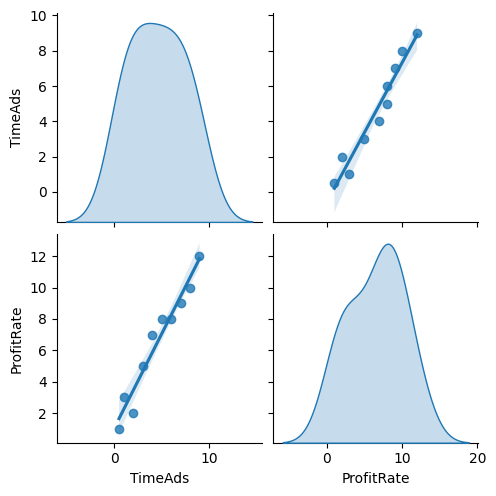

In [3]:
sns.pairplot(df[['TimeAds','ProfitRate']], 
             diag_kind='kde', kind='reg')
plt.show()

In [4]:
# Tập dữ liệu Input (đặc trưng) và Output (mục tiêu)
X = df[['TimeAds']].values # explanatory = feature
y = df[['ProfitRate']].values # reponse = target

In [5]:
# Đảm bảo dữ liệu là kiểu số thực
X = X.astype(float)
y = y.astype(float)

In [6]:
# Cross Validation
# Chia tách ra training (huấn luyện) và testing (kiểm thử)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, 
                                                    random_state=16)

In [7]:
X_train

array([[8.],
       [3.],
       [5.],
       [2.],
       [6.],
       [1.]])

In [8]:
y_train

array([[10.],
       [ 5.],
       [ 8.],
       [ 2.],
       [ 8.],
       [ 3.]])

In [9]:
# Xây dựng mô hình hồi quy tuyến tính đơn biến: ProfitRate = f(TimeAds)
# ProfitRate = A0 + A1*TimeAds + epsilon
from sklearn import linear_model 

In [10]:
# Khai báo mô hình SLR
model = linear_model.LinearRegression()

# Huấn luyện mô hình 
model.fit(X_train,y_train)


LinearRegression()

In [13]:
print(model.intercept_) #b0

print(model.coef_) #b1

[1.215311]
[[1.14832536]]


In [11]:
import numpy as np
from sklearn import metrics

In [15]:
# Tính giá trị dự báo ProfitRate dựa trên dữ liệu TimeAds của tập test
y_test_pred = model.predict(X_test)

In [16]:
print('Score or R-Squared:', model.score(X_test, y_test))

print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_test_pred))  
print('Root Mean Squared Error:', 
      np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('Mean Absolute Percentage Error:', 
      metrics.mean_absolute_percentage_error(y_test, y_test_pred))

Score or R-Squared: 0.9643356772543376
Mean Absolute Error: 0.6710526315789472
Root Mean Squared Error: 0.7598132826197573
Mean Absolute Percentage Error: 0.2563321181742236


RMSE = 
MAE = 0.67 
MAPE = 

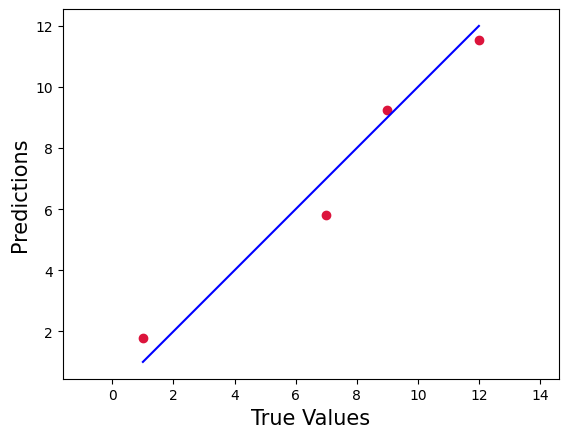

In [17]:
y_test_pred = model.predict(X_test)

plt.scatter(y_test, y_test_pred, c='crimson')

p1 = max(max(y_test_pred), max(y_test))
p2 = min(min(y_test_pred), min(y_test))

plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

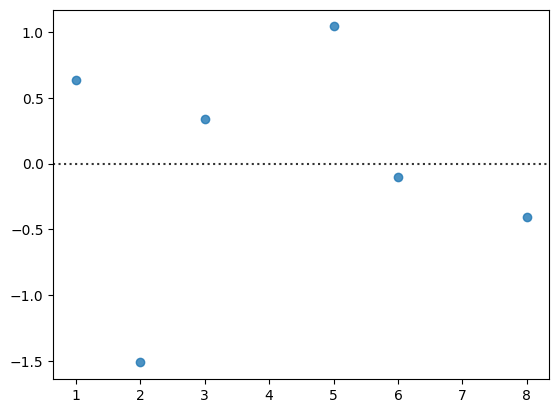

In [18]:
# (Train data set) Vẽ residual bằng Python
sns.residplot(x=X_train, y=y_train)
plt.show()

In [19]:
# Lưu trữ mô hình đã huấn luyện xuống ổ đĩa
'''
Lưu trữ mô hình hồi quy xuống thiết bị lưu trữ với tên
model_linear_regression.sav
'''
import pickle
pickle.dump(model, open('model_linear_regression.sav', 'wb'))

In [20]:
import pickle
#Load model từ storage
loaded_model = pickle.load(open('model_linear_regression.sav', 'rb'))

vTimeAds = float(input('Nhập thời lượng quảng cáo: '))

predicted_ProfitRate = loaded_model.predict([[vTimeAds]])

print(f'Dự báo điểm ProfitRate là: {predicted_ProfitRate}')

Dự báo điểm ProfitRate là: [[12.69856459]]
